<a href="https://colab.research.google.com/github/bernazehraural/kMean/blob/master/Data_Mining_%26_Data_Warehousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h2>Colab nedir?</h2>
</div>

Colab veya diğer adıyla "Colaboratory", tarayıcınızda Python'u yazmanızı ve çalıştırmanızı sağlar.
- Hiç yapılandırma gerektirmez
- GPU'lara ücretsiz erişim
- Kolay paylaşım imkanı sunar

İster <strong>öğrenci</strong> ister <strong>veri bilimci</strong> ister <strong>yapay zeka araştırmacısı</strong> olun, Colab işinizi kolaylaştırabilir. Daha fazla bilgi edinmek için <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab'e Giriş</a> videosunu izleyebilir ya da aşağıdan hemen kullanmaya başlayabilirsiniz.

In [ ]:
import pandas as pd

# Try loading the CSV file with a different encoding
data = pd.read_csv("/content/crime.csv", encoding='latin-1')

# Group by year to see the trend in total number of crimes over the years
total_crimes_by_year = data.groupby('YEAR').size()

# Display the total number of crimes by year
print(total_crimes_by_year)

# Find the most frequent offense code groups (top offenses)
most_common_offenses = data['OFFENSE_CODE_GROUP'].value_counts().head(10)

# Display the most common offenses
print(most_common_offenses)

# Filter for Part One (severe crimes) and count by year
part_one_crimes_by_year = data[data['UCR_PART'] == 'Part One'].groupby('YEAR').size()

# Display the trend of Part One crimes by year
print(part_one_crimes_by_year)

# Group data by district and year to find the areas with the highest crime rates per year
crimes_by_district_year = data.groupby(['YEAR', 'DISTRICT']).size().unstack(fill_value=0)

# Filter for district 'B2' and Part One crimes to find the most common types in this area
b2_part_one_crimes = data[(data['DISTRICT'] == 'B2') & (data['UCR_PART'] == 'Part One')]
most_common_b2_part_one_crimes = b2_part_one_crimes['OFFENSE_CODE_GROUP'].value_counts().head(5)

# Display the district-wise crime counts by year and most common Part One crimes in B2
print (crimes_by_district_year, most_common_b2_part_one_crimes)


# Analyze severe crimes ('Part One') based on time, day, and month
part_one_crimes = data[data['UCR_PART'] == 'Part One']

# (a) Count by hour
part_one_by_hour = part_one_crimes['HOUR'].value_counts().sort_index()

# (b) Count by day of week
part_one_by_day = part_one_crimes['DAY_OF_WEEK'].value_counts()

# (c) Count by month
part_one_by_month = part_one_crimes['MONTH'].value_counts().sort_index()

# Display distribution of Part One crimes by hour, day, and month
print(part_one_by_hour, part_one_by_day, part_one_by_month)

# Determine whether more crimes occur during the day (6 AM - 6 PM) or night (6 PM - 6 AM)
part_one_daytime_crimes = part_one_crimes[(part_one_crimes['HOUR'] >= 6) & (part_one_crimes['HOUR'] < 18)].shape[0]
part_one_nighttime_crimes = part_one_crimes[(part_one_crimes['HOUR'] >= 18) | (part_one_crimes['HOUR'] < 6)].shape[0]

# Display day vs. night crime count for Part One crimes
print(part_one_daytime_crimes, part_one_nighttime_crimes)

# Filter for Part Three crimes (typically minor offenses) and find offenses likely needing traffic police
part_three_crimes = data[data['UCR_PART'] == 'Part Three']
traffic_related_crimes = part_three_crimes[part_three_crimes['OFFENSE_CODE_GROUP'].str.contains('Traffic|Towed|MV Accident', case=False, na=False)]

# Find the top 5 streets with the most traffic-related crimes
top_5_traffic_streets = traffic_related_crimes['STREET'].value_counts().head(5)

# Display the traffic-related crimes and top 5 streets requiring traffic police
print(traffic_related_crimes['OFFENSE_CODE_GROUP'].value_counts(), top_5_traffic_streets)

# Filter for shooting incidents and group by year to see the trend
shooting_incidents = data[data['SHOOTING'] == 'Y']
shooting_by_year = shooting_incidents.groupby('YEAR').size()

# Find the district and street with the most shootings, and most common hours for shootings
top_district_shootings = shooting_incidents['DISTRICT'].value_counts().idxmax()
top_street_shootings = shooting_incidents['STREET'].value_counts().idxmax()
shooting_by_hour = shooting_incidents['HOUR'].value_counts().sort_index()

# Display shooting trends and locations
print(shooting_by_year, top_district_shootings, top_street_shootings, shooting_by_hour)




YEAR
2015     53388
2016     99114
2017    100886
2018     65685
dtype: int64
OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64
YEAR
2015    12256
2016    19222
2017    18316
2018    11835
dtype: int64
DISTRICT     A1   A15    A7     B2     B3    C11    C6   D14     D4   E13  \
YEAR                                                                        
2015       6015  1027  2426   8687   5617   7364  3941  3280   7204  2801   
2016      10923  1986  4130  15706  11145  13603  7073  6279  12953  5559   
2017      11375  2167  4264  15680  11195  13281  7247  6509  13157  5514   
2018    

<ipython-input-14-ceb77f298ea0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_crimes_by_year.index, y=total_crimes_by_year.values, palette="viridis")


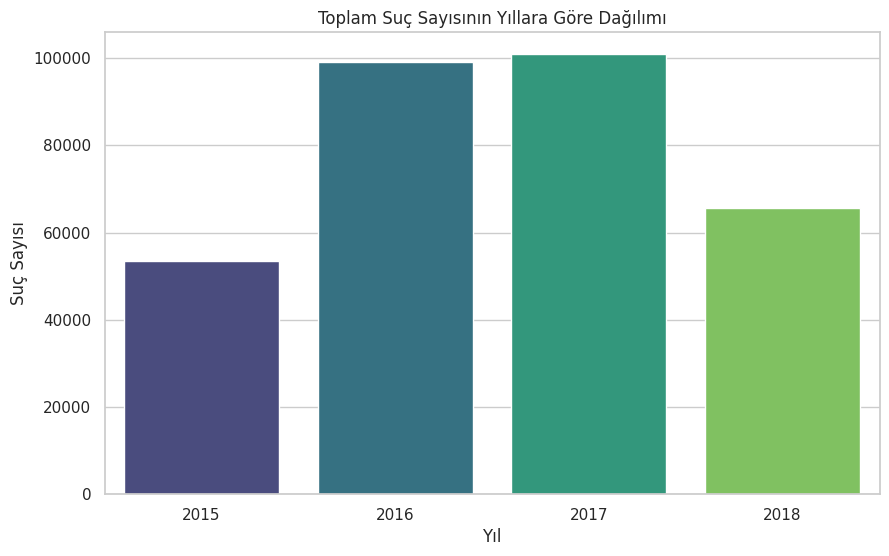

<ipython-input-14-ceb77f298ea0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_common_offenses.values, y=most_common_offenses.index, palette="magma")


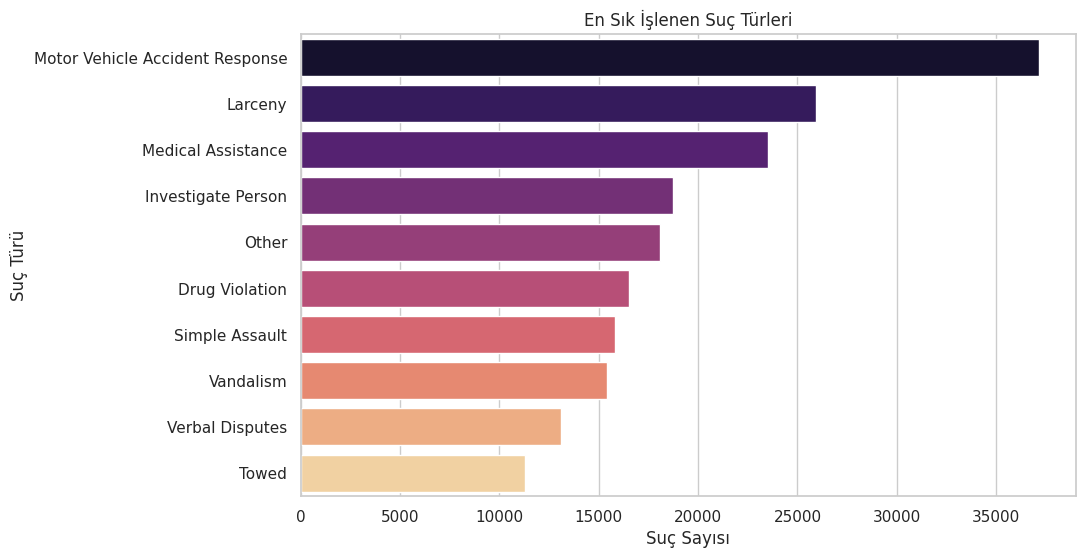

<ipython-input-14-ceb77f298ea0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=part_one_crimes_by_year.index, y=part_one_crimes_by_year.values, palette="cool")


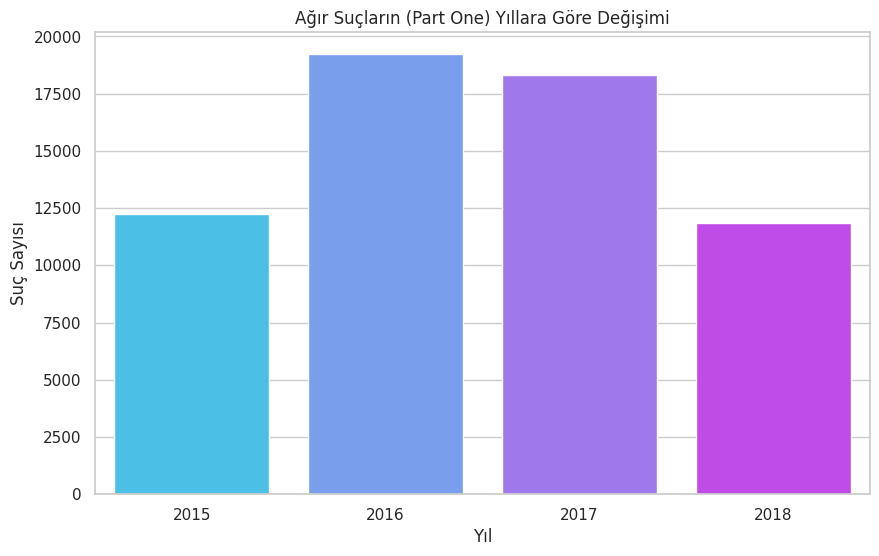

<Figure size 1200x800 with 0 Axes>

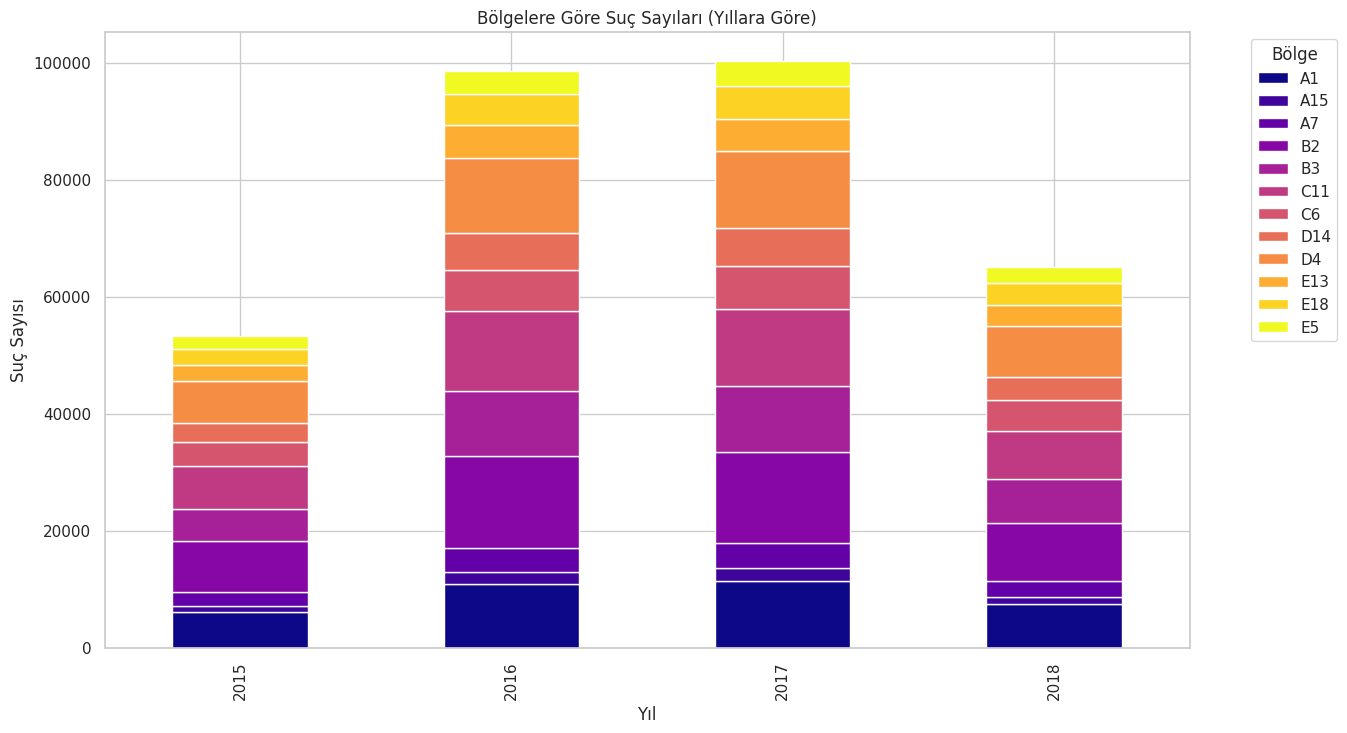

<ipython-input-14-ceb77f298ea0>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_common_b2_part_one_crimes.values, y=most_common_b2_part_one_crimes.index, palette="flare")


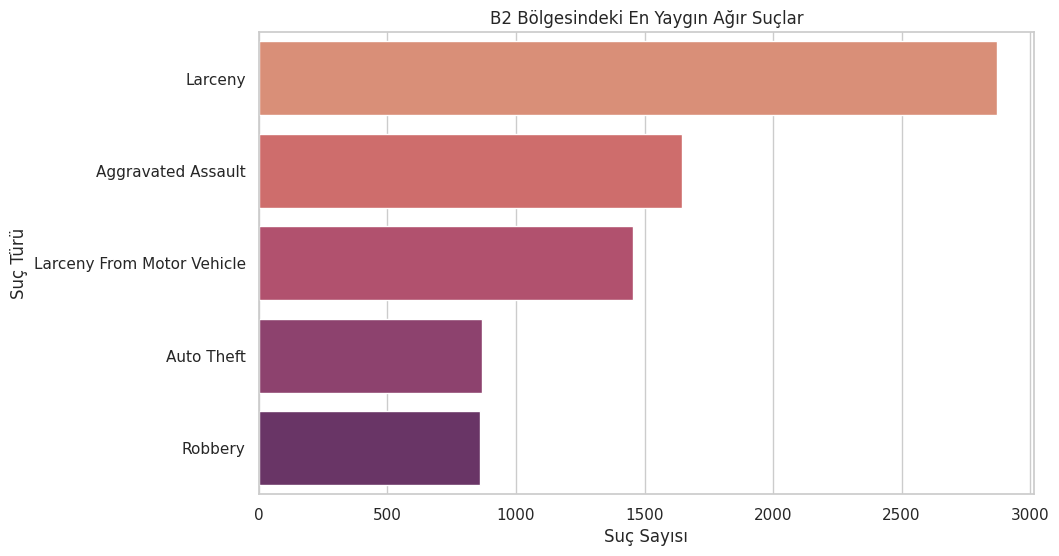

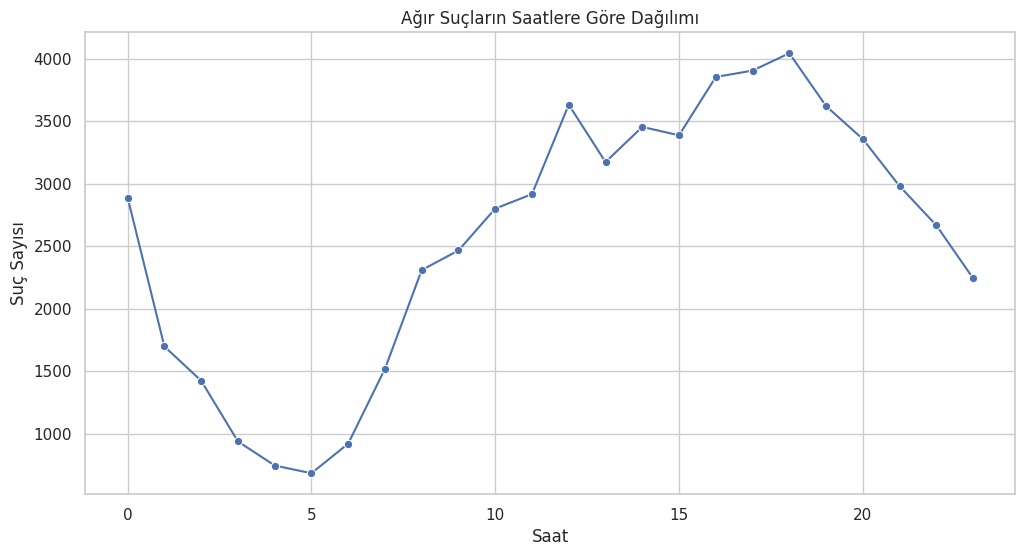

<ipython-input-14-ceb77f298ea0>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=part_one_by_day.index, y=part_one_by_day.values, palette="viridis")


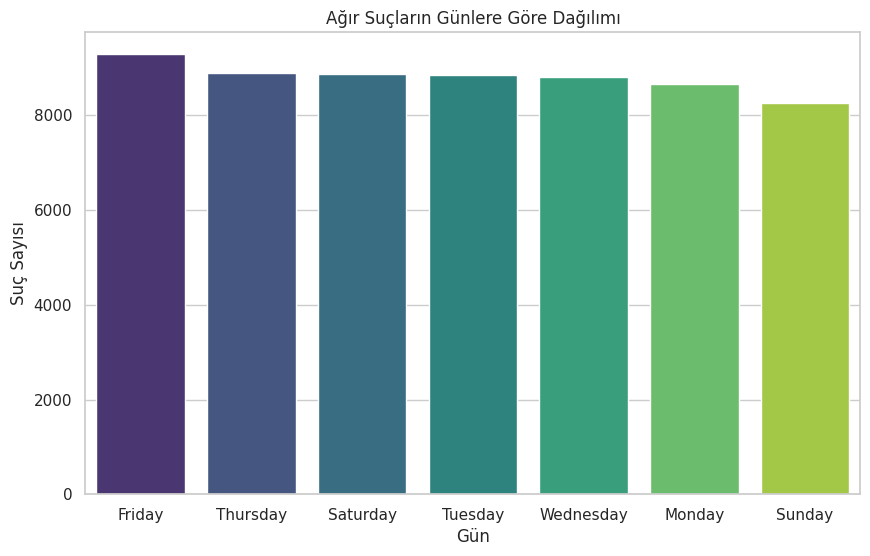

<ipython-input-14-ceb77f298ea0>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=part_one_by_month.index, y=part_one_by_month.values, palette="summer")


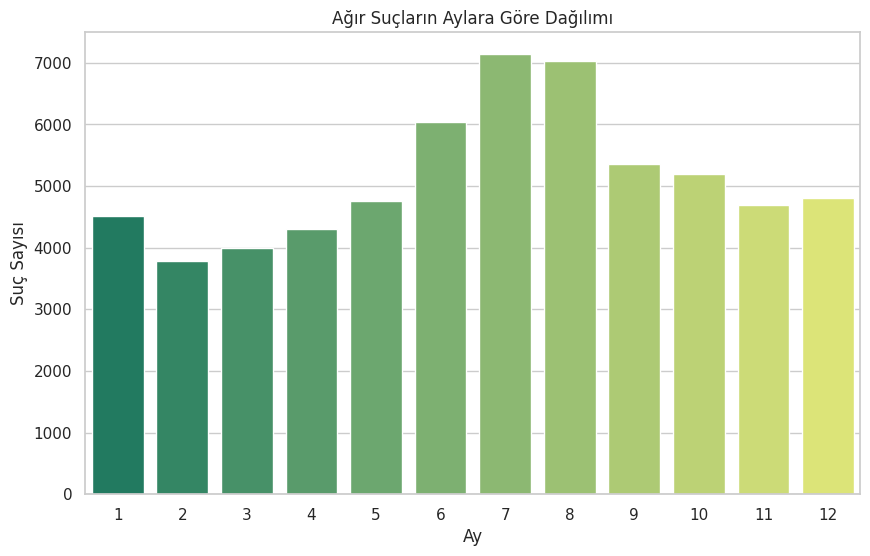

<ipython-input-14-ceb77f298ea0>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_traffic_streets.values, y=top_5_traffic_streets.index, palette="cividis")


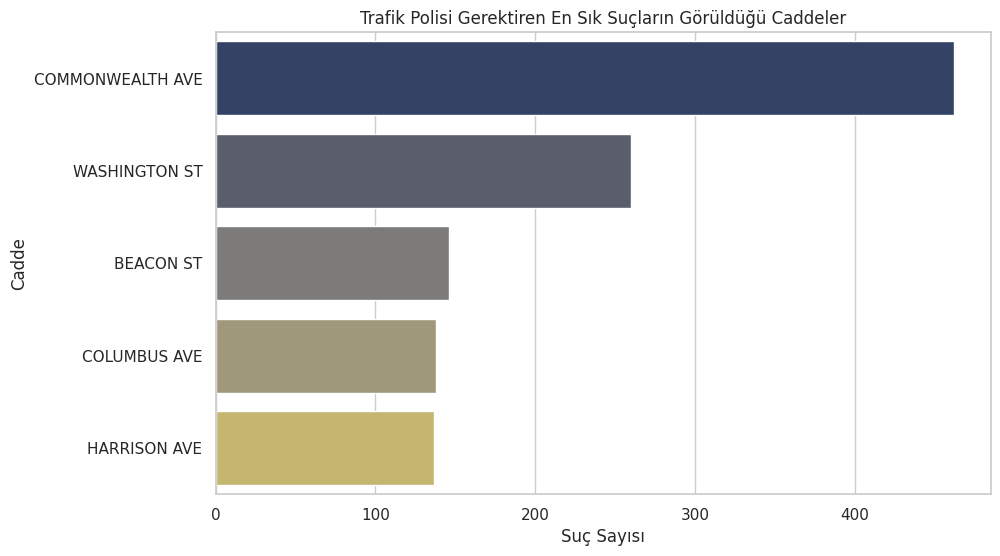

<ipython-input-14-ceb77f298ea0>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shooting_by_year.index, y=shooting_by_year.values, palette="autumn")


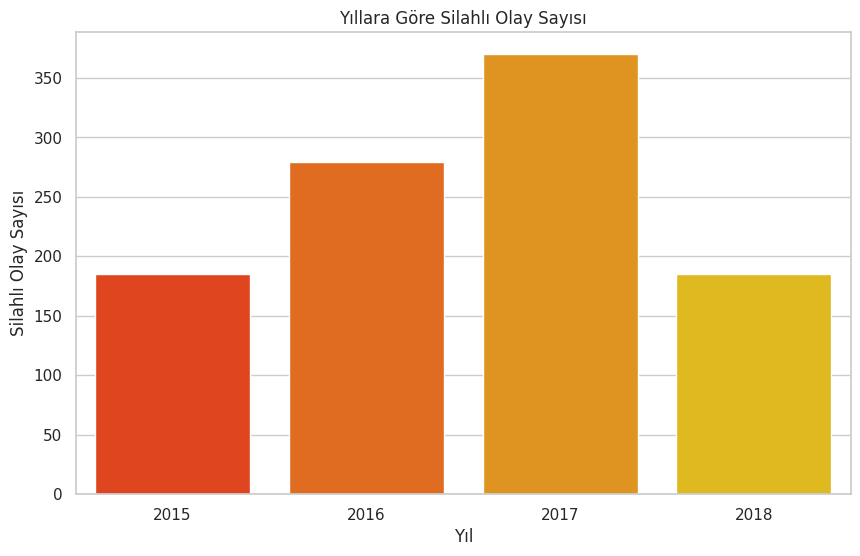

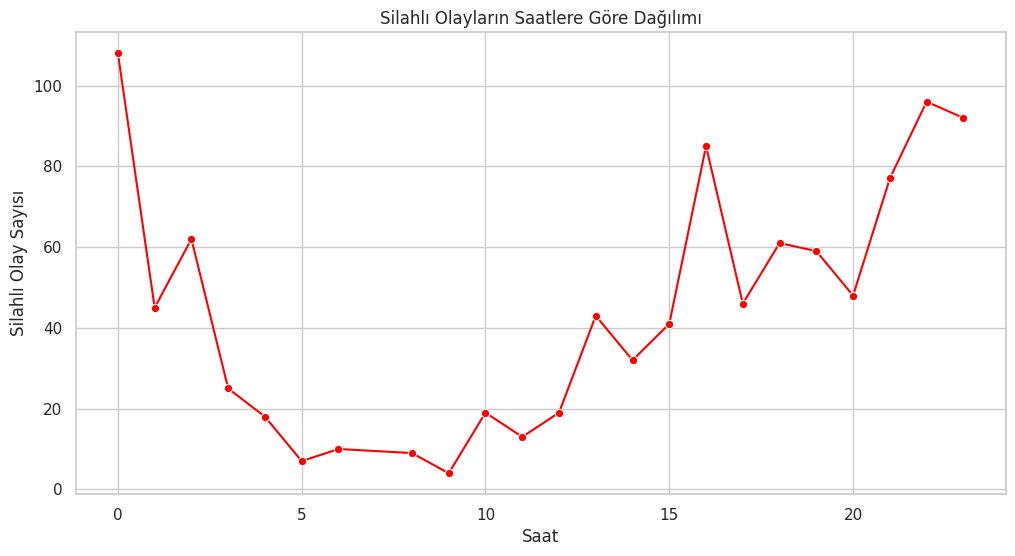

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles for better visualization
sns.set(style="whitegrid")

# 1. Toplam suç sayısının yıllara göre değişimi
plt.figure(figsize=(10, 6))
sns.barplot(x=total_crimes_by_year.index, y=total_crimes_by_year.values, palette="viridis")
plt.title("Toplam Suç Sayısının Yıllara Göre Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Suç Sayısı")
plt.show()

# 2. En sık işlenen suç türleri
plt.figure(figsize=(10, 6))
sns.barplot(x=most_common_offenses.values, y=most_common_offenses.index, palette="magma")
plt.title("En Sık İşlenen Suç Türleri")
plt.xlabel("Suç Sayısı")
plt.ylabel("Suç Türü")
plt.show()

# 3. Ağır suçların yıllara göre değişimi
plt.figure(figsize=(10, 6))
sns.barplot(x=part_one_crimes_by_year.index, y=part_one_crimes_by_year.values, palette="cool")
plt.title("Ağır Suçların (Part One) Yıllara Göre Değişimi")
plt.xlabel("Yıl")
plt.ylabel("Suç Sayısı")
plt.show()

# 4. Bölgelere göre suç sayıları (yıllara göre)
plt.figure(figsize=(12, 8))
crimes_by_district_year.plot(kind="bar", stacked=True, colormap="plasma", figsize=(14, 8))
plt.title("Bölgelere Göre Suç Sayıları (Yıllara Göre)")
plt.xlabel("Yıl")
plt.ylabel("Suç Sayısı")
plt.legend(title="Bölge", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. B2 Bölgesi'ndeki en yaygın ağır suçlar
plt.figure(figsize=(10, 6))
sns.barplot(x=most_common_b2_part_one_crimes.values, y=most_common_b2_part_one_crimes.index, palette="flare")
plt.title("B2 Bölgesindeki En Yaygın Ağır Suçlar")
plt.xlabel("Suç Sayısı")
plt.ylabel("Suç Türü")
plt.show()

# 6. Ağır suçların saat, gün ve ay dağılımı
# Saat dağılımı
plt.figure(figsize=(12, 6))
sns.lineplot(x=part_one_by_hour.index, y=part_one_by_hour.values, marker="o", color="b")
plt.title("Ağır Suçların Saatlere Göre Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Suç Sayısı")
plt.show()

# Gün dağılımı
plt.figure(figsize=(10, 6))
sns.barplot(x=part_one_by_day.index, y=part_one_by_day.values, palette="viridis")
plt.title("Ağır Suçların Günlere Göre Dağılımı")
plt.xlabel("Gün")
plt.ylabel("Suç Sayısı")
plt.show()

# Ay dağılımı
plt.figure(figsize=(10, 6))
sns.barplot(x=part_one_by_month.index, y=part_one_by_month.values, palette="summer")
plt.title("Ağır Suçların Aylara Göre Dağılımı")
plt.xlabel("Ay")
plt.ylabel("Suç Sayısı")
plt.show()

# 7. Trafik polisi gerektiren suçlar ve en çok ihtiyaç duyulan caddeler
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_traffic_streets.values, y=top_5_traffic_streets.index, palette="cividis")
plt.title("Trafik Polisi Gerektiren En Sık Suçların Görüldüğü Caddeler")
plt.xlabel("Suç Sayısı")
plt.ylabel("Cadde")
plt.show()

# 8. Silahlı olayların yıllara göre dağılımı
plt.figure(figsize=(10, 6))
sns.barplot(x=shooting_by_year.index, y=shooting_by_year.values, palette="autumn")
plt.title("Yıllara Göre Silahlı Olay Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Silahlı Olay Sayısı")
plt.show()

# 9. Silahlı olayların saatlere göre dağılımı
plt.figure(figsize=(12, 6))
sns.lineplot(x=shooting_by_hour.index, y=shooting_by_hour.values, marker="o", color="red")
plt.title("Silahlı Olayların Saatlere Göre Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Silahlı Olay Sayısı")
plt.show()
